# Polypy

### Tutorial 1 

In [1]:
from polypy import read as rd
from polypy import density as Dens
from polypy import utils as ut
from polypy import write as wr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


In [2]:
timestep = 0.25
data = rd.read_history("example_data/HISTORY", ["CA", "F"])

In [3]:
total_density = Dens.Density(data)
ca_density = Dens.Density(data, atom_type="CA")
f_density = Dens.Density(data, atom_type="F")

Multiple atom types detected - Splitting Coordinates


### Calculating the total number of species within a region

In [4]:
plane = ca_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of Ca Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")
print("Average Number of Ca Between -5.0 - 5.0 :", plane / data['timesteps'])

plane = f_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of F Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")
print("Average Number of F Between -5.0 - 5.0 :", plane / data['timesteps'])

Total Number of Ca Between -5.0 - 5.0 : 81575  across  500 timesteps
Average Number of Ca Between -5.0 - 5.0 : 163.15
Total Number of F Between -5.0 - 5.0 : 195904  across  500 timesteps
Average Number of F Between -5.0 - 5.0 : 391.808


## One Dimension

### number density

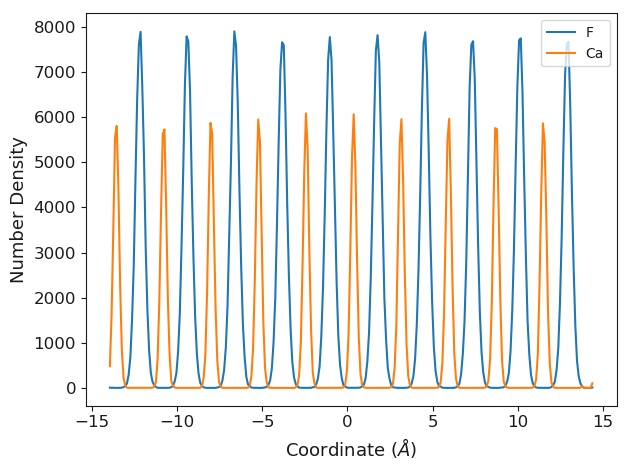

In [5]:
cx, cy = ca_density.one_dimensional_density(Bin=0.1, direction="x")
fx, fy = f_density.one_dimensional_density(Bin=0.1, direction="x")

wr.one_dimensional_density_plot([fx, cx], [fy, cy], ["F", "Ca"])

### Charge Density

\begin{align}
\rho_q(z) = \sum_{i} q_i \rho_i(z)
\end{align}

where $\rho_{i}$ is the density of atom i and $q_{i}$ is its charge.   

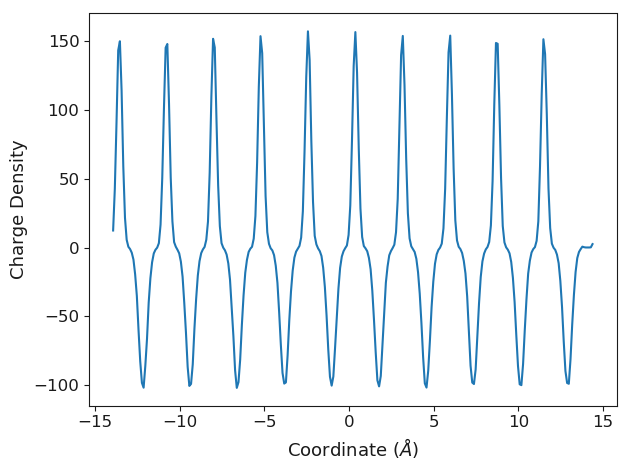

In [6]:
bin_volume = 0.1 * np.mean(data['lv'][:,1] * np.mean(data['lv'][:,2]))

charge_density = ut.one_dimensional_charge_density([fy, cy], [-1.0, 2.0], bin_volume)

wr.one_dimensional_charge_density_plot(fx, charge_density)

### Electric Field

\begin{align}
E(z) = \frac{1}{- \epsilon_{0}} \int_{z_{0}}^{z} \rho_{q}(z')dz'
\end{align}

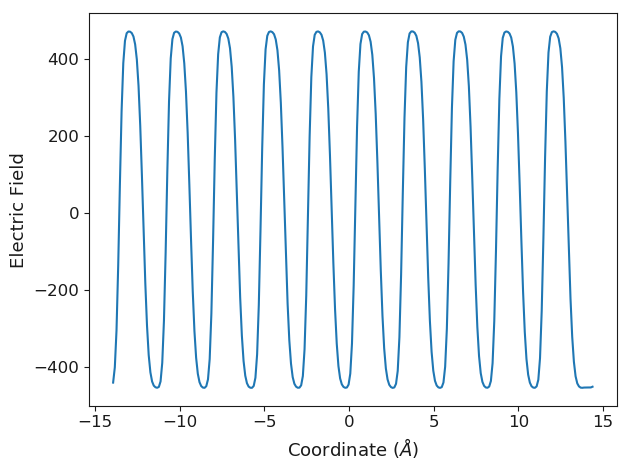

In [7]:
dx, e_field, potential = ut.poisson_solver(fx, charge_density, data['timesteps'])
wr.electric_field_plot(dx, e_field)

### Electrostatic Potential

\begin{align}
\Delta_{\psi}(z) = \int_{z_{0}}^{z} E(z')dz'
\end{align}

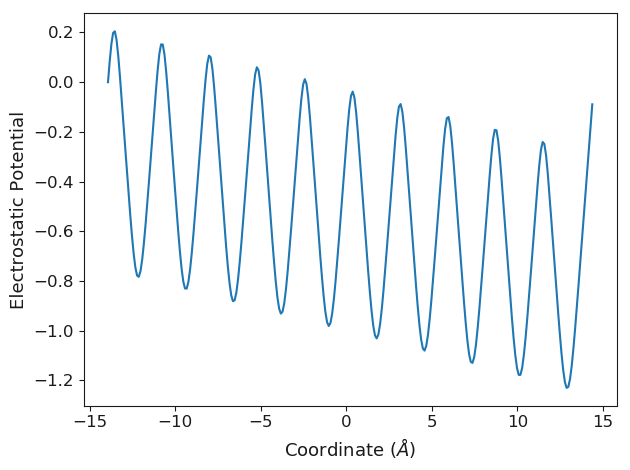

In [8]:
wr.electrostatic_potential_plot(dx, potential)

## Two Dimensions

### Number Density

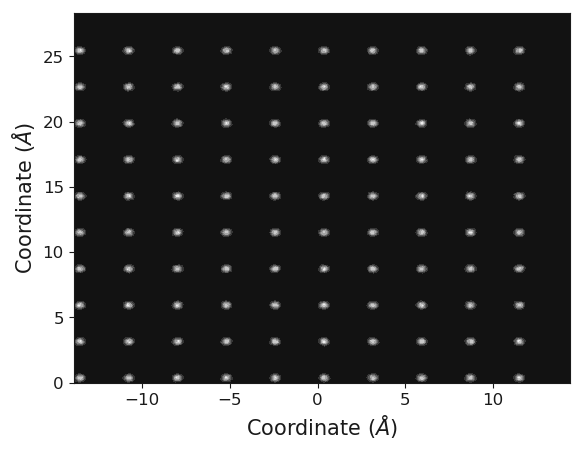

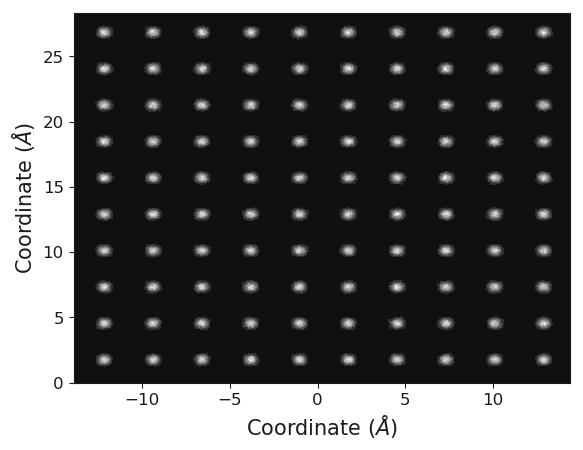

In [9]:
cx, cy, cz = ca_density.two_dimensional_density(box=0.1)
fx, fy, fz = f_density.two_dimensional_density(box=0.1)

wr.two_dimensional_density_plot(cx, cy, cz)
wr.two_dimensional_density_plot(fx, fy, fz)

### Charge Density

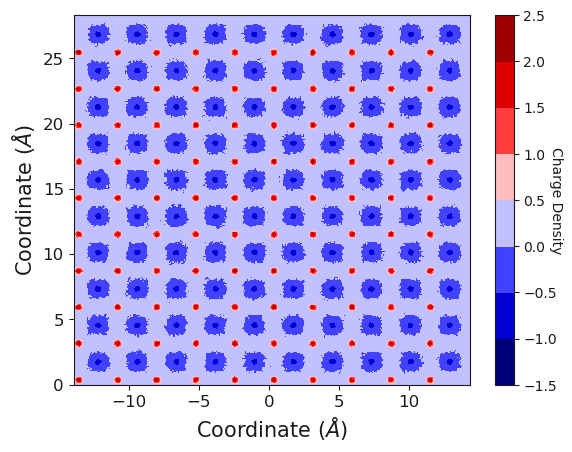

In [10]:
box_volume = 0.1 * 0.1 * np.mean(data['lv'][:,0])

charge_density = ut.two_dimensional_charge_density([fz, cz], [-1.0, 2.0], box_volume)
wr.two_dimensional_charge_density_plot(fx, fy, charge_density)

## One and Two Dimensions

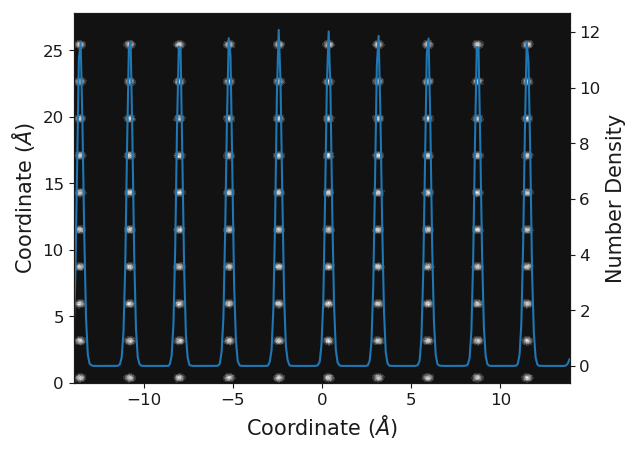

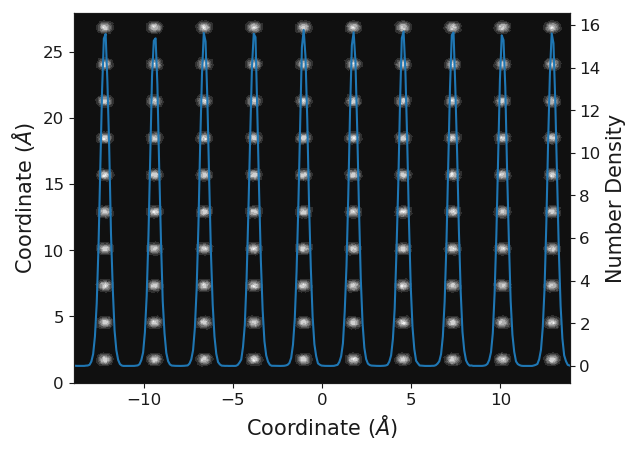

In [12]:
cx, cy, cz, cy2 = ca_density.one_and_two_dimension_overlay(box=0.1)
fx, fy, fz, fy2 = f_density.one_and_two_dimension_overlay(box=0.1)

wr.combined_density_plot(cx, cy, cz, cy2)
wr.combined_density_plot(fx, fy, fz, fy2)